In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('training_dataset.csv')
print(df.head())

   customer_number  usia               pekerjaan status_perkawinan  \
0           531036    63  sosial media specialis           menikah   
1           999241    43                 teknisi           menikah   
2           995002    29  sosial media specialis            lajang   
3           932750    40           pekerja kasar           menikah   
4           684699    40  sosial media specialis            lajang   

          pendidikan gagal_bayar_sebelumnya pinjaman_rumah pinjaman_pribadi  \
0  Pendidikan Tinggi                     no            yes               no   
1  Pendidikan Tinggi                     no            yes               no   
2  Pendidikan Tinggi                     no            yes              yes   
3                SMA                     no             no               no   
4  Pendidikan Tinggi                     no             no               no   

  jenis_kontak bulan_kontak_terakhir  ... hari_sejak_kontak_sebelumnya  \
0     cellular                

In [4]:
df.describe()

,customer_number,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
count,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000
mean,550930.993193,40.016233,2.561878,962.210377,0.170143,0.077915,93.576541,-40.485717,3.617890,5166.773124,0.114069
std,259909.889175,10.438059,2.794178,187.566774,0.490611,1.576176,0.580586,4.641091,1.737591,72.479698,0.317902
min,100108.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,325755.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,553139.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,777157.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,999997.000000,98.000000,42.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [6]:
df.isnull().sum()

customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
berlangganan_deposito           0
dtype: int64

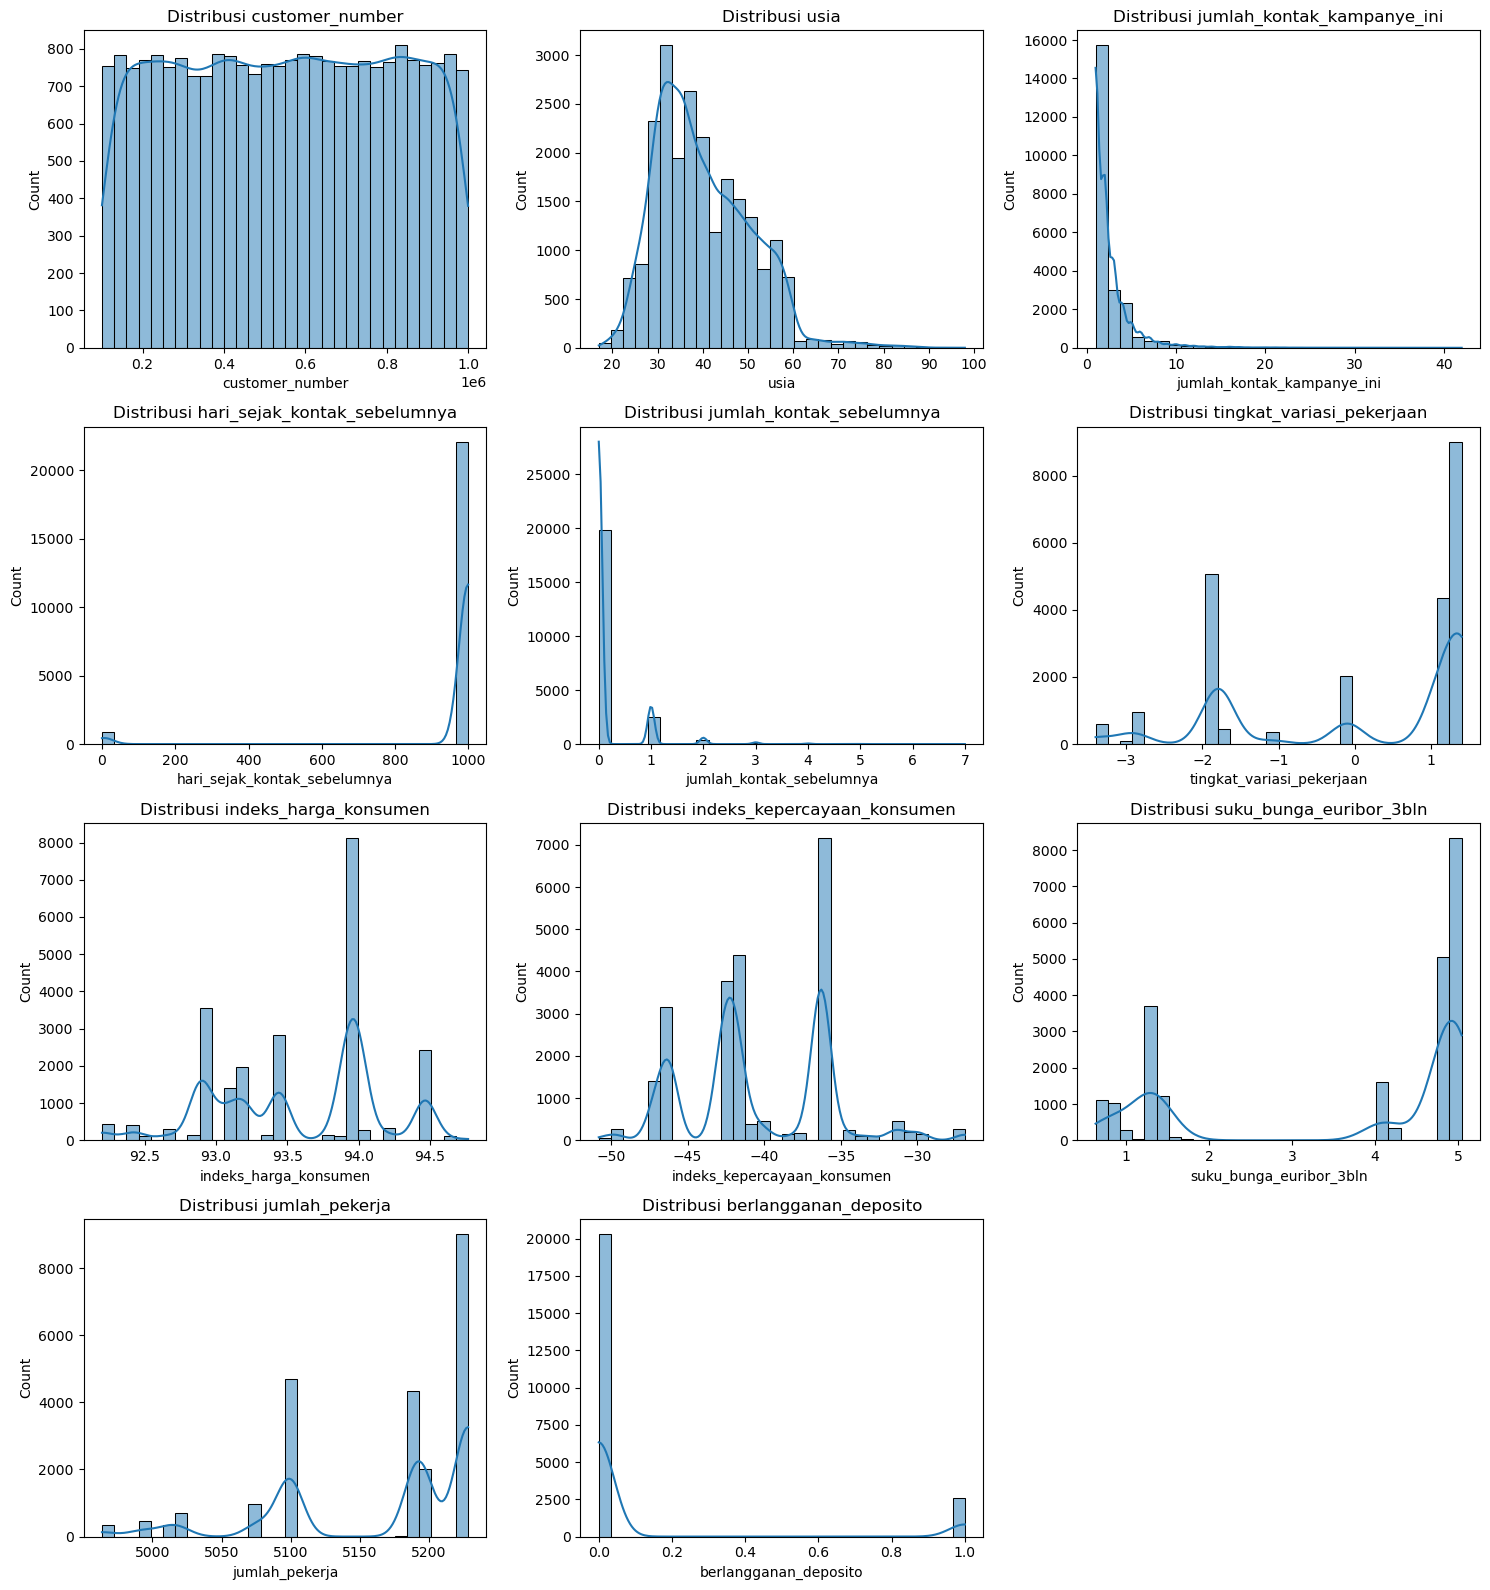

In [7]:
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3 
n_rows = -(-len(numerik_cols) // n_cols)  

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numerik_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

In [8]:
y = df['berlangganan_deposito']
df = df.drop('berlangganan_deposito', axis=1)

In [9]:
# One hot encoding
df = pd.get_dummies(df, columns=['pekerjaan', 
                                 'status_perkawinan', 
                                 'pendidikan', 
                                 'gagal_bayar_sebelumnya', 
                                 'pinjaman_rumah', 
                                 'pinjaman_pribadi', 
                                 'jenis_kontak', 
                                 'bulan_kontak_terakhir', 
                                 'hari_kontak_terakhir', 
                                 'hasil_kampanye_sebelumnya', 
                                 'pulau'], drop_first=True).astype(int)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [11]:
print(df_scaled)

       customer_number      usia  jumlah_kontak_kampanye_ini  \
0            -0.076547  2.201968                   -0.201093   
1             1.724905  0.285861                   -0.201093   
2             1.708595 -1.055414                   -0.558988   
3             1.469076 -0.001555                   -0.201093   
4             0.514682 -0.001555                    0.156802   
...                ...       ...                         ...   
22911         0.498053 -0.767998                   -0.201093   
22912        -0.175072 -0.959609                   -0.201093   
22913        -0.931031 -1.055414                   -0.558988   
22914         1.211531  1.148109                   -0.201093   
22915         1.639589  0.860693                   -0.558988   

       hari_sejak_kontak_sebelumnya  jumlah_kontak_sebelumnya  \
0                          0.196146                 -0.346806   
1                          0.196146                 -0.346806   
2                          0.196146 

In [13]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import optuna

In [14]:
X = df

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [24]:
def objective(trial):
    rf = RandomForestClassifier(
        n_estimators=trial.suggest_int('rf_n_estimators', 50, 300),
        max_depth=trial.suggest_int('rf_max_depth', 3, 20),
        min_samples_split=trial.suggest_int('rf_min_samples_split', 2, 10),
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )

    ratio = len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1])

    xgb = XGBClassifier(
        n_estimators=trial.suggest_int('xgb_n_estimators', 50, 300),
        max_depth=trial.suggest_int('xgb_max_depth', 3, 10),
        learning_rate=trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
        subsample=trial.suggest_float('xgb_subsample', 0.5, 1.0),
        colsample_bytree=trial.suggest_float('xgb_colsample', 0.5, 1.0),
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=ratio
    )

    
    meta = GradientBoostingClassifier(
        n_estimators=trial.suggest_int('meta_n_estimators', 50, 300),
        learning_rate=trial.suggest_float('meta_learning_rate', 0.01, 0.3, log=True),
        max_depth=trial.suggest_int('meta_max_depth', 2, 10),
        subsample=trial.suggest_float('meta_subsample', 0.5, 1.0),
        random_state=42
    )

    model = StackingClassifier(
        estimators=[('rf', rf), ('xgb', xgb)],
        final_estimator=meta,
        cv=5,
        n_jobs=-1
    )

    score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    return score.mean()


In [25]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
best_params = study.best_trial.params
print("Best Parameters:", best_params)

[I 2025-06-07 13:36:22,379] A new study created in memory with name: no-name-545a941a-e805-4b8d-ab11-c63901ce47e4
[I 2025-06-07 13:37:38,108] Trial 0 finished with value: 0.9279396640383958 and parameters: {'rf_n_estimators': 120, 'rf_max_depth': 14, 'rf_min_samples_split': 8, 'xgb_n_estimators': 243, 'xgb_max_depth': 8, 'xgb_learning_rate': 0.12717529125430008, 'xgb_subsample': 0.5440743686110365, 'xgb_colsample': 0.6665272649370729, 'meta_n_estimators': 196, 'meta_learning_rate': 0.014822466728464373, 'meta_max_depth': 9, 'meta_subsample': 0.5737887116812364}. Best is trial 0 with value: 0.9279396640383958.
[I 2025-06-07 13:38:24,019] Trial 1 finished with value: 0.9111073020226261 and parameters: {'rf_n_estimators': 81, 'rf_max_depth': 5, 'rf_min_samples_split': 7, 'xgb_n_estimators': 93, 'xgb_max_depth': 4, 'xgb_learning_rate': 0.015248547821874663, 'xgb_subsample': 0.7762358328329821, 'xgb_colsample': 0.6149742572682827, 'meta_n_estimators': 142, 'meta_learning_rate': 0.0313974089

Best Parameters: {'rf_n_estimators': 286, 'rf_max_depth': 15, 'rf_min_samples_split': 6, 'xgb_n_estimators': 275, 'xgb_max_depth': 8, 'xgb_learning_rate': 0.05766793139117237, 'xgb_subsample': 0.8072401763089773, 'xgb_colsample': 0.7646016316585867, 'meta_n_estimators': 263, 'meta_learning_rate': 0.023893687251901254, 'meta_max_depth': 3, 'meta_subsample': 0.7356817356736343}


In [39]:
rf_best = RandomForestClassifier(
    n_estimators=best_params['rf_n_estimators'],
    max_depth=best_params['rf_max_depth'],
    min_samples_split=best_params['rf_min_samples_split'],
    random_state=42,
    class_weight='balanced'
)

ratio = len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1])

xgb_best = XGBClassifier(
    n_estimators=best_params['xgb_n_estimators'],
    max_depth=best_params['xgb_max_depth'],
    learning_rate=best_params['xgb_learning_rate'],
    subsample=best_params['xgb_subsample'],
    colsample_bytree=best_params['xgb_colsample'],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=ratio
)


meta_best = GradientBoostingClassifier(
    n_estimators=best_params.get('meta_n_estimators', 100), 
    learning_rate=best_params.get('meta_learning_rate', 0.1),
    max_depth=best_params.get('meta_max_depth', 3),
    subsample=best_params.get('meta_subsample', 1.0),
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_best), ('xgb', xgb_best)],
    final_estimator=meta_best,
    cv=5,
    n_jobs=-1
)

stacking_model.fit(X_resampled, y_resampled)
y_pred = stacking_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8889616055846422
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4063
           1       0.61      0.07      0.12       521

    accuracy                           0.89      4584
   macro avg       0.75      0.53      0.53      4584
weighted avg       0.86      0.89      0.85      4584



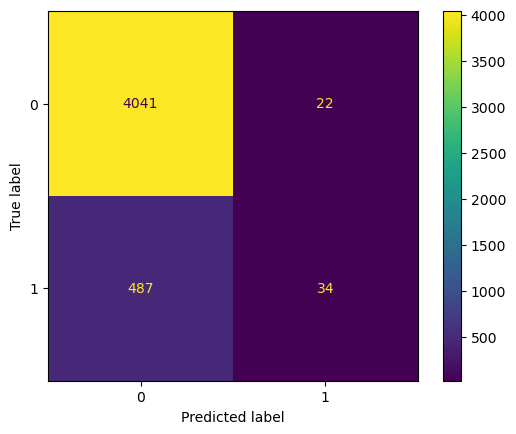

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [45]:
from sklearn.metrics import f1_score, roc_auc_score

print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1]))

F1 Score: 0.11785095320623917
ROC AUC Score: 0.7654785024539132
